<a href="https://colab.research.google.com/github/bahti21/test_1/blob/main/%D0%BF%D0%BE%D0%B4%D1%81%D1%87%D0%B5%D1%82%20%D0%BA%D0%BB%D0%B5%D1%82%D0%BE%D0%BA%20%D1%81%20%D0%B8%D0%B7%D0%BE%D0%B1%D1%80%D0%B0%D0%B6%D0%B5%D0%BD%D0%B8%D1%8F%20%D0%BC%D0%B8%D0%BA%D1%80%D0%BE%D1%81%D0%BA%D0%BE%D0%BF%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Путь до изображения: /живые1.jpg
[0 9 0]
0.025249411764705885
Количество звёзд: 1453


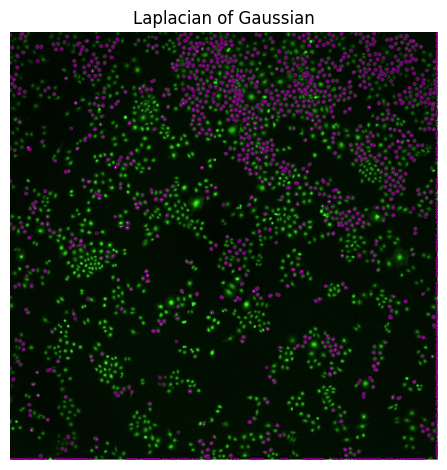

In [ ]:
from scipy.spatial import distance
from skimage import io
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray

import matplotlib.pyplot as plt
image = io.imread(input("Путь до изображения: "))
image_gray = rgb2gray(image)
print(image[0, 0])
print(image_gray[0, 0])
blobs_log = blob_log(image_gray, max_sigma=30, num_sigma=10, threshold=.05)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.set_title('Laplacian of Gaussian')
ax.imshow(image)
c_stars = 0
for blob in blobs_log:
    y, x, r = blob
    if r > 2:
        continue
    ax.add_patch(plt.Circle((x, y), r, color='purple', linewidth=2, fill=False))
    c_stars += 1
print("Количество звёзд: " + str(c_stars))
ax.set_axis_off()
plt.tight_layout()
plt.show()


[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142]
[[ 29.17924382  55.14905866]
 [ 35.33533534 147.99139139]
 [ 28.42974607 216.49117291]
 [ 34.35891239 287.50956697]
 [ 30.82541819 363.38646414]
 [ 49.36544656 443.47540264]
 [ 32.86339144 521.10633914]
 [ 43.10151926 613.42633377]
 [ 26.93184012 712.82544893]
 [ 33.83615917 815.15346021]
 [ 78.00375494 755.31916996]
 [ 94.33307985  34.00513308]
 [ 87.77777778 106.0646592 ]
 [ 96.98458505 679.07205592]
 [ 89.3235475

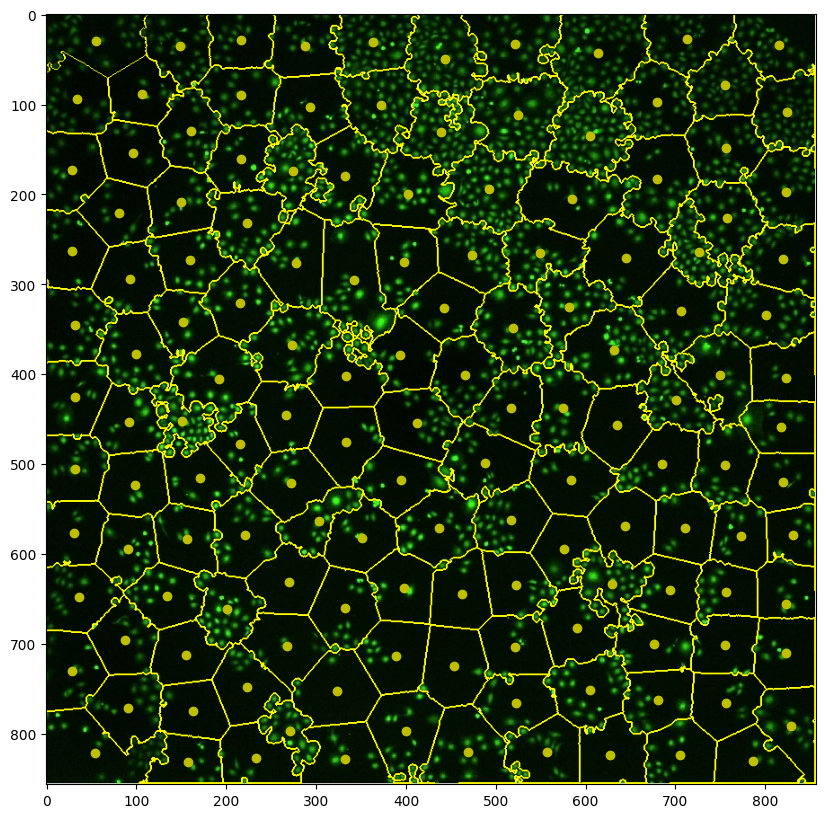

In [ ]:
from skimage.segmentation import slic, mark_boundaries
import numpy as np
from sklearn.cluster import KMeans
segments = slic(image, start_label=0, n_segments=200, compactness=20)
segments_ids = np.unique(segments)
print(segments_ids)

# centers
centers = np.array([np.mean(np.nonzero(segments == i), axis=1) for i in segments_ids])
print(centers)
vs_right = np.vstack([segments[:, :-1].ravel(), segments[:, 1:].ravel()])
vs_below = np.vstack([segments[:-1, :].ravel(), segments[1:, :].ravel()])
bneighbors = np.unique(np.hstack([vs_right, vs_below]), axis=1)


fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
plt.imshow(mark_boundaries(image, segments))
plt.scatter(centers[:, 1], centers[:, 0], c='y')

for i in range(bneighbors.shape[1]):
    y0, x0 = centers[bneighbors[0, i]]
    y1, x1 = centers[bneighbors[1, i]]
    #ax.add_line(l = Line2D ([x0, x1], [y0, y1], alpha=0.5))
dict_seg = {}
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        seg = segments[i, j]
        if seg not in dict_seg.keys():
            dict_seg[seg] = [image[i, j]]
            continue
        dict_seg[seg].append(image[i, j])



Number of dead (red) cells: 10
Number of live (green) cells: 282


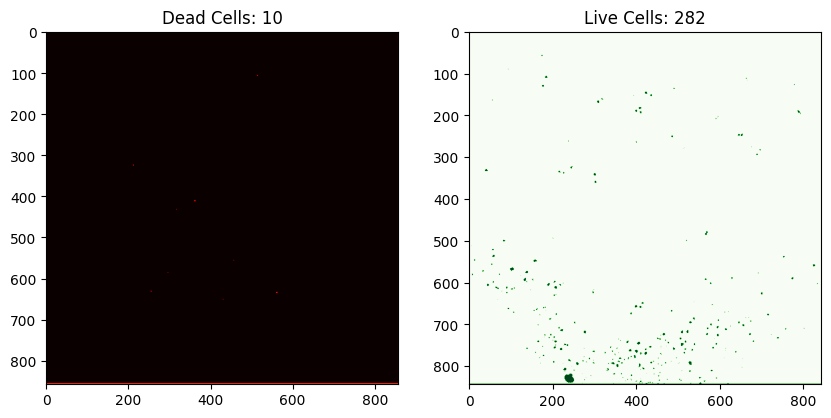

In [ ]:
import cv2
import numpy as np
from skimage import measure
import matplotlib.pyplot as plt

#загружаем фотографии
red_image_path = '/content/sample_data/photo/мертвые23(21).PNG'
green_image_path = '/content/sample_data/photo/живые21.PNG'

red_image = cv2.imread(red_image_path)
green_image = cv2.imread(green_image_path)

# преобразуем в черно-бело-серые фотографии
red_gray = cv2.cvtColor(red_image, cv2.COLOR_BGR2GRAY)
green_gray = cv2.cvtColor(green_image, cv2.COLOR_BGR2GRAY)

_, red_thresh = cv2.threshold(red_gray, 50, 255, cv2.THRESH_BINARY)
_, green_thresh = cv2.threshold(green_gray, 50, 255, cv2.THRESH_BINARY)

# маркируем объекты
red_labels = measure.label(red_thresh, connectivity=2)
green_labels = measure.label(green_thresh, connectivity=2)

num_red_cells = len(np.unique(red_labels)) - 1  # вычитаем фон
num_green_cells = len(np.unique(green_labels)) - 1  #

print(f"Number of dead (red) cells: {num_red_cells}")
print(f"Number of live (green) cells: {num_green_cells}")

# результаты
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(red_thresh, cmap='hot')
ax[0].set_title(f'Dead Cells: {num_red_cells}')
ax[1].imshow(green_thresh, cmap='Greens')
ax[1].set_title(f'Live Cells: {num_green_cells}')
plt.show()


In [ ]:
import cv2
import numpy as np
from skimage import measure
import os
import pandas as pd

# Функция для подсчета клеток
def count_cells(image_path, threshold_method='adaptive', threshold_value=50):
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error loading image: {image_path}")
        return -1
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    if threshold_method == 'adaptive':
        thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                       cv2.THRESH_BINARY, 11, 2)
    else:
        _, thresh = cv2.threshold(gray, threshold_value, 255, cv2.THRESH_BINARY)

    labels = measure.label(thresh, connectivity=2)
    num_cells = len(np.unique(labels)) - 1  # вычитаем один для фона
    return num_cells

# Путь к папке с изображениями
folder_path = '/content/sample_data/photo1'

# Списки для хранения данных
data = []

# Обработка изображений
for i in range(1, 22):
    red_image_path = None
    green_image_path = None

    # Поиск файлов независимо от регистра
    for filename in os.listdir(folder_path):
        if filename.lower() == f'мертвые{i}.png'.lower():
            red_image_path = os.path.join(folder_path, filename)
        elif filename.lower() == f'живые{i}.png'.lower():
            green_image_path = os.path.join(folder_path, filename)

    if red_image_path is None:
        print(f"File not found: мертвые{i}.png")
        continue

    if green_image_path is None:
        print(f"File not found: живые{i}.png")
        continue

    num_red_cells = count_cells(red_image_path, threshold_method='adaptive')
    num_green_cells = count_cells(green_image_path, threshold_method='adaptive')

    # Если одно из изображений не загрузилось, пропускаем эту пару
    if num_red_cells == -1 or num_green_cells == -1:
        continue

    data.append([i, num_red_cells, num_green_cells])

# Создание DataFrame и вывод результатов
df = pd.DataFrame(data, columns=['Номер фото', 'Количество мертвых клеток', 'Количество живых клеток'])
print(df)

# Проверка и создание директории, если необходимо
os.makedirs(folder_path, exist_ok=True)

# Сохранение результатов в CSV файл
output_file_path = os.path.join(folder_path, 'cell_counts.csv')
df.to_csv(output_file_path, index=False, encoding='utf-8')




    Номер фото  Количество мертвых клеток  Количество живых клеток
0            1                         11                     5015
1            2                         11                     5306
2            3                         22                     4951
3            4                         27                     5000
4            5                         16                     6732
5            6                          9                     4672
6            7                          6                     2310
7            8                          9                     2881
8            9                          8                     2670
9           10                          5                     3524
10          11                          6                     3888
11          12                         15                     3090
12          13                         11                     2485
13          14                          5                     